In [10]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(forcats)
library(knitr)

# Charger les données
data <- read.csv(
  "/content/sample_data/liste_circoncision_anonymisee.csv",
  sep = ",",
  dec = ".",
  stringsAsFactors = FALSE
)

# Nettoyer les données
data <- data %>%
  mutate(
    Date = parse_date_time(
      Date,
      orders = c("dmy", "dmY", "ymd", "Ymd", "d/m/Y", "d-m-Y"),
      exact = FALSE
    ),
    annee = year(Date),
    age_jours = as.numeric(`age.en.jours`),
    age_mois = as.numeric(`age.en.mois`),
    age_annee = as.numeric(`age.en.année`),
    operateur = `Opérateur`,
    contexte = Contexte,
    anesthesie = `Anesthésie`,
    indication = `Indication.de.la.circoncision`
  )

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Date = parse_date_time(...)`.
Caused by warning:
!  3388 failed to parse.”


In [11]:
names(data)

[1] "Date"                                                              
 [2] "Âge.au.moment.de.la.circoncision..mois.années."                    
 [3] "age.en.jours"                                                      
 [4] "age.en.mois"                                                       
 [5] "age.en.année"                                                      
 [6] "État.nutritionnel"                                                 
 [7] "Indication.de.la.circoncision"                                     
 [8] "Opérateur"                                                         
 [9] "Contexte"                                                          
[10] "Anesthésie"                                                        
[11] "Antécédent.d.infection.génito.urinaire..0.1."                      
[12] "Antécédent.de.prématurité..0.1."                                   
[13] "Antécédent.de.chirurgie.urogénitale..0.1."                         
[14] "Hygiène.locale.préopératoire"                                      
[15] "Utilisation.d.antibioprophylaxie..0.1."                            
[16] "Conditions.d.asepsie.respectées..0.1."                             
[17] "Type.de.pansement"                                                 
[18] "Délai.consultation.si.complication..jours."                        
[19] "Hémorragie.post.opératoire..0.1."                                  
[20] "Gravité.hémorragie"                                                
[21] "Infection.du.site.opératoire..0.1."                                
[22] "Œdème...hématome.important..0.1."                                  
[23] "Retard.de.chute...impaction.de.l.anneau..si.Plastibell.ring...0.1."
[24] "Douleur.persistante...mal.contrôlée..0.1."                         
[25] "Adhérences.balano.préputielles..0.1."                              
[26] "Excision.incomplète...excès.cutané..0.1."                          
[27] "Besoin.de.révision.chirurgicale..0.1."                             
[28] "Sténose.méatale..0.1."                                             
[29] "Fistule.uréthro.cutanée..0.1."                                     
[30] "Lésion.iatrogène.du.gland...urètre..0.1."                          
[31] "Nécrose...ischémie.du.gland..0.1."                                 
[32] "Aspect.esthétique.insatisfaisant..0.1."                            
[33] "Délai.entre.circoncision.et.complication..jours."                  
[34] "annee"                                                             
[35] "age_jours"                                                         
[36] "age_mois"                                                          
[37] "age_annee"                                                         
[38] "operateur"                                                         
[39] "contexte"                                                          
[40] "anesthesie"                                                        
[41] "indication"

In [12]:
head(data, 5)

,Date,Âge.au.moment.de.la.circoncision..mois.années.,age.en.jours,age.en.mois,age.en.année,État.nutritionnel,Indication.de.la.circoncision,Opérateur,Contexte,Anesthésie,⋯,Aspect.esthétique.insatisfaisant..0.1.,Délai.entre.circoncision.et.complication..jours.,annee,age_jours,age_mois,age_annee,operateur,contexte,anesthesie,indication
,<dttm>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,2020-12-31,416,416,14,1,dénutrition,médicale,pediatre,domicile,locale,⋯,0,111,2020,416,14,1,pediatre,domicile,locale,médicale
2,2019-12-31,1728,1728,57,5,dénutrition,religieuse,chirurgien,cabinet,aucune,⋯,0,187,2019,1728,57,5,chirurgien,cabinet,aucune,religieuse
3,2019-12-31,2956,2956,97,8,dénutrition,autre,chirurgien,domicile,aucune,⋯,0,33,2019,2956,97,8,chirurgien,domicile,aucune,autre
4,2015-12-31,3521,3521,116,10,obésité,autre,circociseur traditionel,cabinet,générale,⋯,0,270,2015,3521,116,10,circociseur traditionel,cabinet,générale,autre
5,2014-12-31,3283,3283,108,9,dénutrition,religieuse,chirurgien,hôpital,locale,⋯,0,256,2014,3283,108,9,chirurgien,hôpital,locale,religieuse


In [13]:
str(data)

'data.frame':	3709 obs. of  41 variables:
 $ Date                                                              : POSIXct, format: "2020-12-31" "2019-12-31" ...
 $ Âge.au.moment.de.la.circoncision..mois.années.                    : int  416 1728 2956 3521 3283 3465 4253 342 2626 3723 ...
 $ age.en.jours                                                      : int  416 1728 2956 3521 3283 3465 4253 342 2626 3723 ...
 $ age.en.mois                                                       : int  14 57 97 116 108 114 140 11 86 122 ...
 $ age.en.année                                                      : int  1 5 8 10 9 9 12 1 7 10 ...
 $ État.nutritionnel                                                 : chr  "dénutrition" "dénutrition" "dénutrition" "obésité" ...
 $ Indication.de.la.circoncision                                     : chr  "médicale" "religieuse" "autre" "autre" ...
 $ Opérateur                                                         : chr  "pediatre" "chirurgien" "chirurgien" "

In [14]:
resume_age <- data %>%
  summarise(
    n = n(),
    age_median_jours = median(age_jours, na.rm = TRUE),
    age_Q1_jours = quantile(age_jours, 0.25, na.rm = TRUE),
    age_Q3_jours = quantile(age_jours, 0.75, na.rm = TRUE),
    age_median_mois = median(age_mois, na.rm = TRUE),
    age_moyen_mois = mean(age_mois, na.rm = TRUE),
    ecart_type_mois = sd(age_mois, na.rm = TRUE)
  )

resume_age %>% kable(digits = 1)



|    n| age_median_jours| age_Q1_jours| age_Q3_jours| age_median_mois| age_moyen_mois| ecart_type_mois|
|----:|----------------:|------------:|------------:|---------------:|--------------:|---------------:|
| 3709|             2228|         1165|         3294|              73|           73.4|            40.7|

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


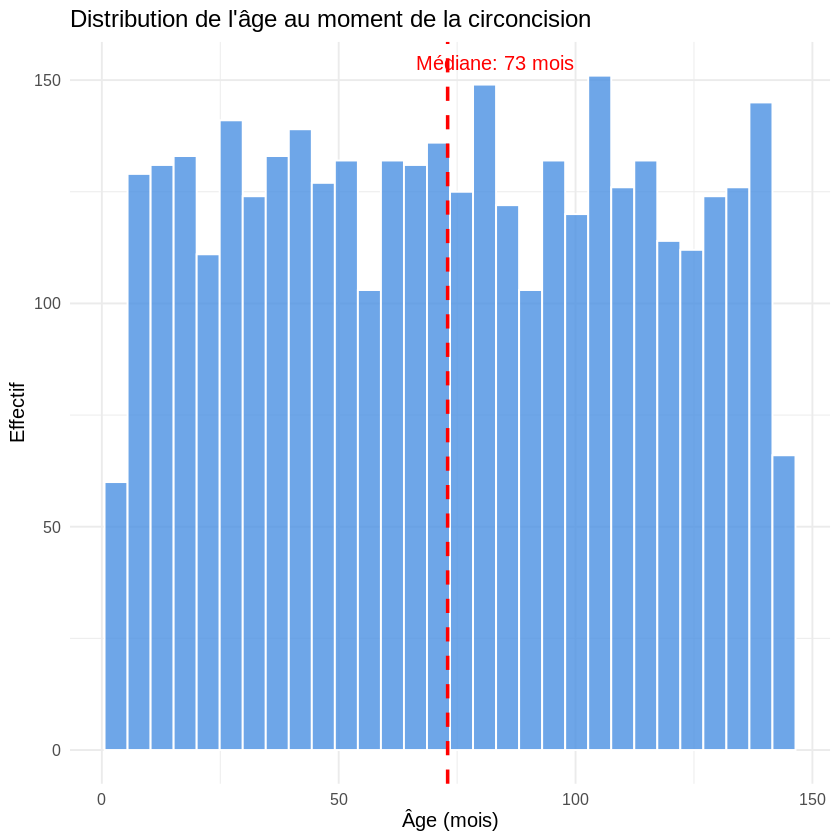

In [15]:
ggplot(data, aes(x = age_mois)) +
  geom_histogram(bins = 30, fill = "#4a90e2", color = "white", alpha = 0.8) +
  geom_vline(aes(xintercept = median(age_mois, na.rm = TRUE)),
             color = "red", linetype = "dashed", size = 1) +
  annotate("text", x = median(data$age_mois, na.rm = TRUE) + 10,
           y = Inf, label = paste("Médiane:", round(median(data$age_mois, na.rm = TRUE), 1), "mois"),
           vjust = 2, color = "red") +
  labs(title = "Distribution de l'âge au moment de la circoncision",
       x = "Âge (mois)", y = "Effectif") +
  theme_minimal(base_size = 12)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


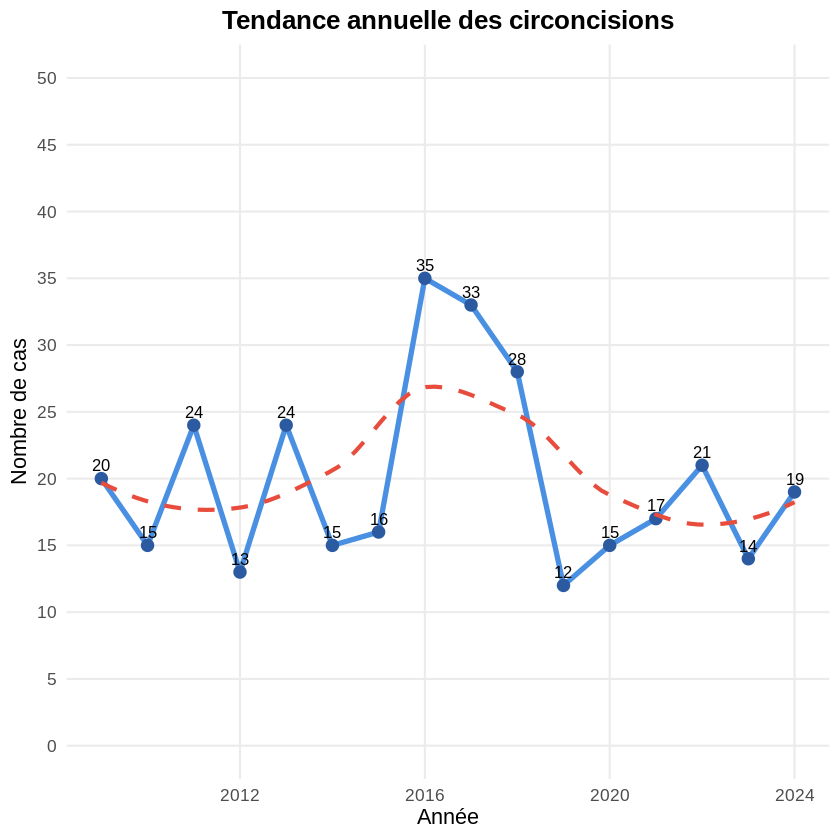

In [16]:
cas_par_annee <- data %>%
  group_by(annee) %>%
  summarise(n = n())

ggplot(cas_par_annee, aes(x = annee, y = n)) +
  geom_line(color = "#4a90e2", linewidth = 1.5) +
  geom_point(color = "#2c5aa0", size = 3) +
  geom_text(aes(label = n), vjust = -0.6, size = 3.5) +
  geom_smooth(method = "loess", se = FALSE,
              color = "#e74c3c", linetype = "dashed") +
  scale_y_continuous(
    limits = c(0, 50),
    breaks = seq(0, 50, 5)
  ) +
  labs(
    title = "Tendance annuelle des circoncisions",
    x = "Année",
    y = "Nombre de cas"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    panel.grid.minor = element_blank(),
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

In [17]:
operateurs_stats <- data %>%
  count(operateur, sort = TRUE) %>%
  mutate(
    pourcentage = round(100 * n / sum(n), 1),
    pourcentage_cumul = cumsum(pourcentage)
  )

operateurs_stats %>%
  head(10) %>%
  kable(col.names = c("Opérateur", "Nombre", "Pourcentage (%)", "Cumulé (%)"))



|Opérateur               | Nombre| Pourcentage (%)| Cumulé (%)|
|:-----------------------|------:|---------------:|----------:|
|resident generaliste    |    964|            26.0|       26.0|
|chirurgien              |    947|            25.5|       51.5|
|circociseur traditionel |    925|            24.9|       76.4|
|pediatre                |    873|            23.5|       99.9|

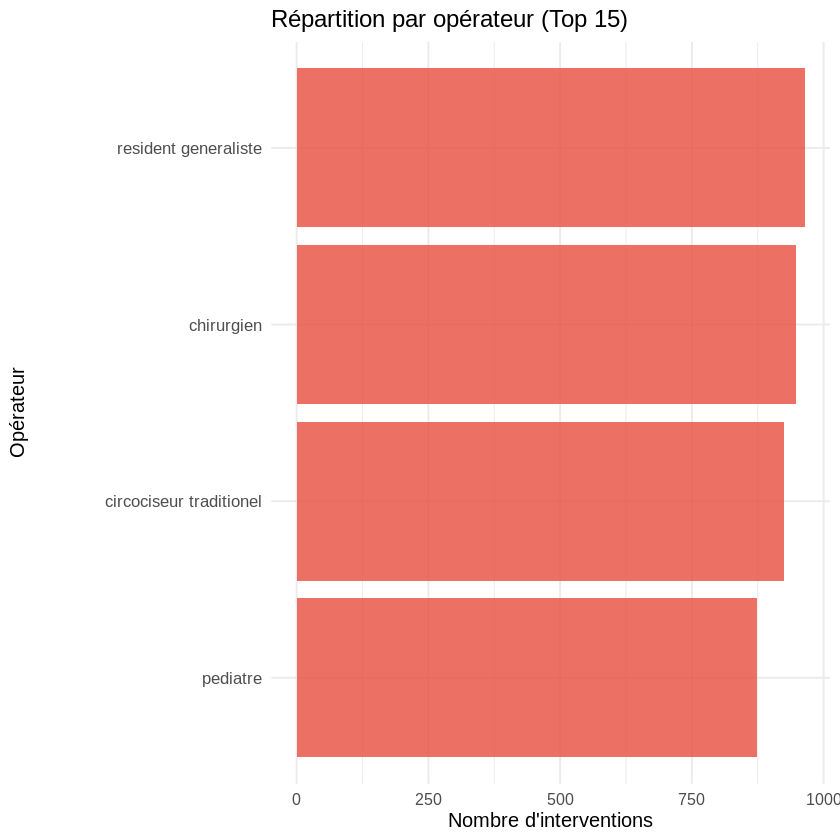

In [18]:
top_operateurs <- data %>%
  count(operateur, sort = TRUE) %>%
  head(15)

data %>%
  filter(operateur %in% top_operateurs$operateur) %>%
  ggplot(aes(x = fct_reorder(operateur, operateur, .fun = length))) +
  geom_bar(fill = "#e74c3c", alpha = 0.8) +
  coord_flip() +
  labs(title = "Répartition par opérateur (Top 15)",
       x = "Opérateur", y = "Nombre d'interventions") +
  theme_minimal(base_size = 12) +
  theme(axis.text.y = element_text(size = 10))

In [19]:
contexte_stats <- data %>%
  count(contexte, sort = TRUE) %>%
  mutate(pourcentage = round(100 * n / sum(n), 1))

contexte_stats %>% kable(col.names = c("Contexte", "Nombre", "Pourcentage (%)"))



|Contexte | Nombre| Pourcentage (%)|
|:--------|------:|---------------:|
|cabinet  |   1250|            33.7|
|hôpital  |   1241|            33.5|
|domicile |   1218|            32.8|

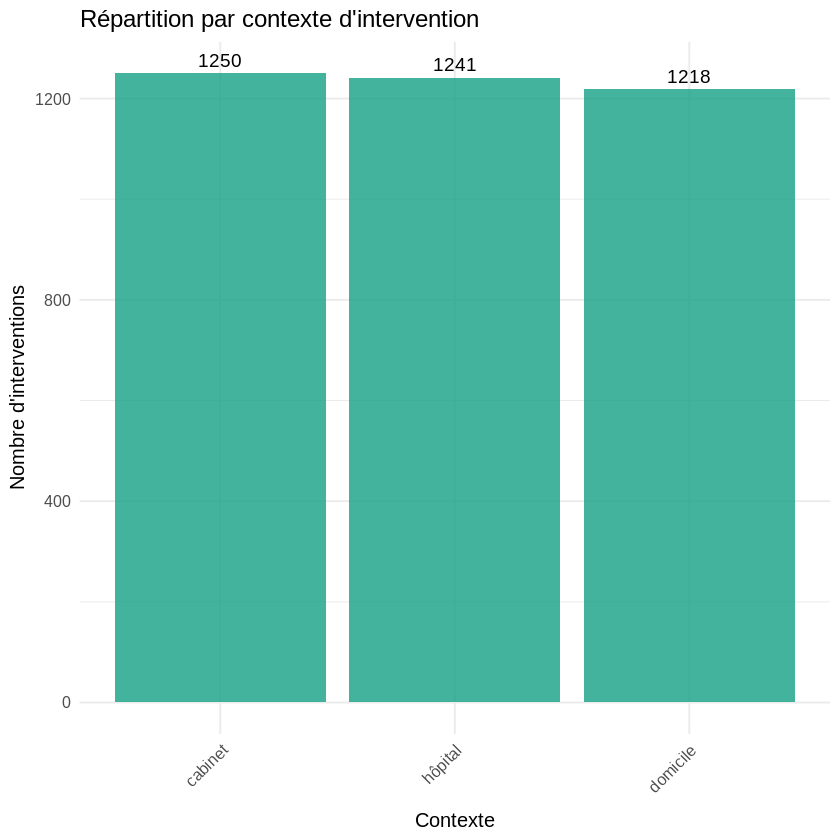

In [20]:
ggplot(data, aes(x = fct_infreq(contexte))) +
  geom_bar(fill = "#16a085", alpha = 0.8) +
  geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.5, size = 4) +
  labs(title = "Répartition par contexte d'intervention",
       x = "Contexte", y = "Nombre d'interventions") +
  theme_minimal(base_size = 12) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [21]:
anesthesie_stats <- data %>%
  count(anesthesie, sort = TRUE) %>%
  mutate(pourcentage = round(100 * n / sum(n), 1))

anesthesie_stats %>% kable(col.names = c("Type d'anesthésie", "Nombre", "Pourcentage (%)"))



|Type d'anesthésie | Nombre| Pourcentage (%)|
|:-----------------|------:|---------------:|
|locale            |   1281|            34.5|
|aucune            |   1220|            32.9|
|générale          |   1208|            32.6|

In [22]:
indications_stats <- data %>%
  count(indication, sort = TRUE) %>%
  mutate(pourcentage = round(100 * n / sum(n), 1))

indications_stats %>%
  head(10) %>%
  kable(col.names = c("Indication", "Nombre", "Pourcentage (%)"))



|Indication | Nombre| Pourcentage (%)|
|:----------|------:|---------------:|
|médicale   |   1246|            33.6|
|autre      |   1244|            33.5|
|religieuse |   1219|            32.9|

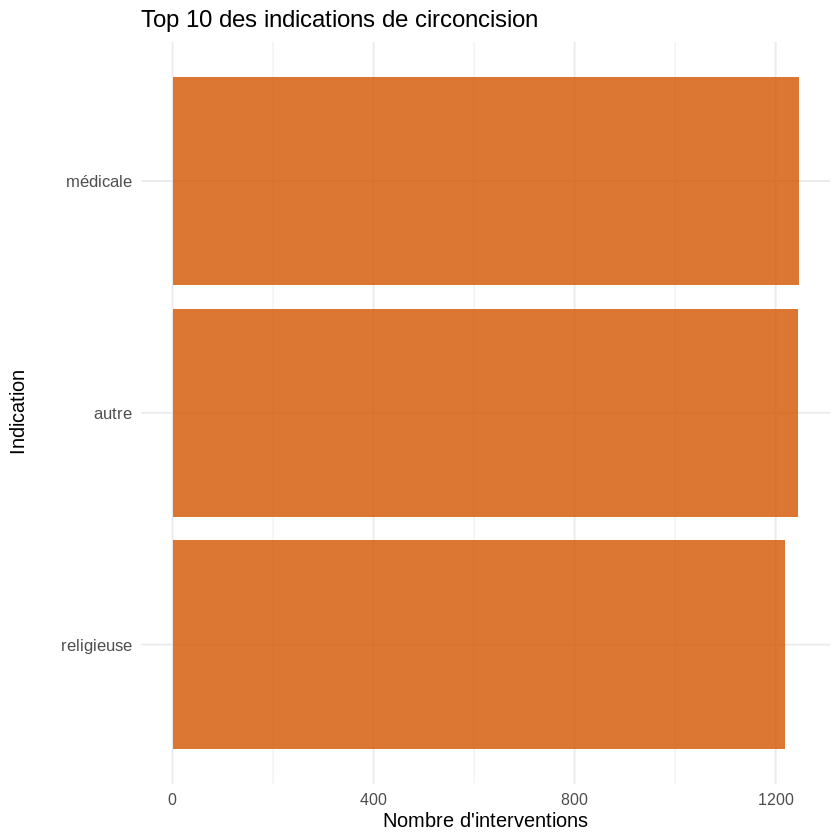

In [23]:
top_indications <- data %>%
  count(indication, sort = TRUE) %>%
  head(10)

data %>%
  filter(indication %in% top_indications$indication) %>%
  ggplot(aes(x = fct_reorder(indication, indication, .fun = length))) +
  geom_bar(fill = "#d35400", alpha = 0.8) +
  coord_flip() +
  labs(title = "Top 10 des indications de circoncision",
       x = "Indication", y = "Nombre d'interventions") +
  theme_minimal(base_size = 12) +
  theme(axis.text.y = element_text(size = 10))

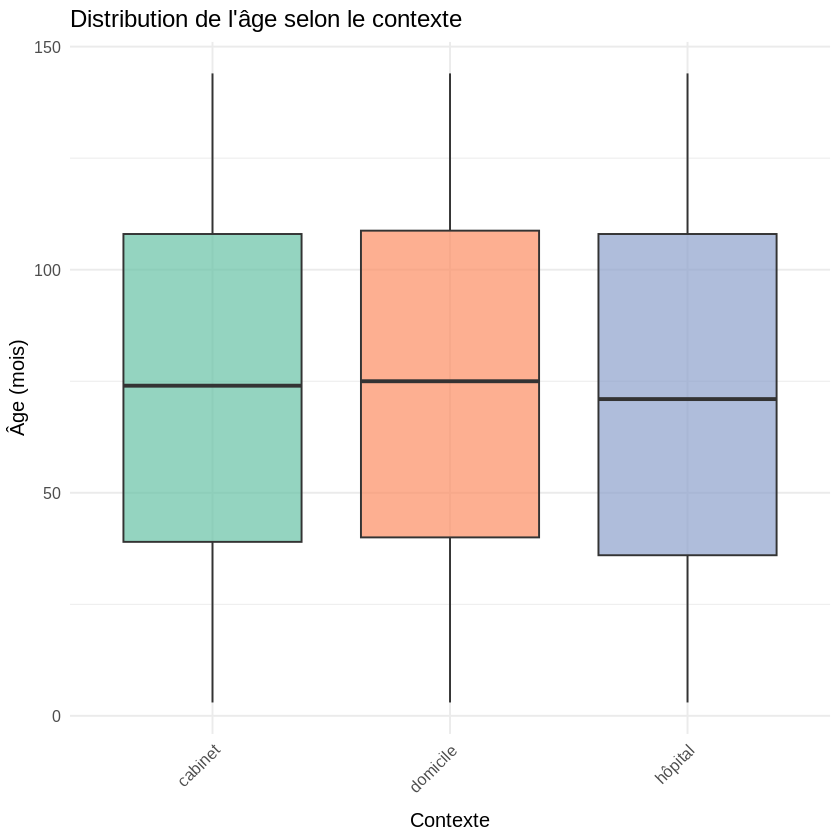

In [24]:
data %>%
  filter(!is.na(contexte) & !is.na(age_mois)) %>%
  ggplot(aes(x = contexte, y = age_mois, fill = contexte)) +
  geom_boxplot(alpha = 0.7) +
  labs(title = "Distribution de l'âge selon le contexte",
       x = "Contexte", y = "Âge (mois)") +
  theme_minimal(base_size = 12) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_brewer(palette = "Set2")